# Taller 2

Juan Felipe Palacios - jf.palacios - 201616389

In [606]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

In [607]:
df_ciudad = pd.read_csv('https://raw.githubusercontent.com/jufepalacios/Ciencia_Datos_Aplicada/main/Taller_2/Data_Taller_2.csv',delimiter=';', decimal=',')
df_ciudad.head()

,instant,Date,Season,Holiday,Weather,Temp,Feel_Temp,Hum,Wind,Casual,Registered,cnt
0,1,1/01/2020,Springer,No,Mist + Cloudy,8.175849,9.090375,0.805833,10.749882,331,654,985
1,2,2/01/2020,Springer,No,Mist + Cloudy,9.083466,8.625733,0.696087,-16.652113,131,670,801
2,3,3/01/2020,Springer,No,Few clouds,1.229108,0.902035,0.437273,16.636703,120,1229,1349
3,4,4/01/2020,Springer,No,Few clouds,1.400000,1.969734,0.590435,10.739832,108,1454,1562
4,5,5/01/2020,Springer,No,Partly cloudy,2.666979,2.775690,0.436957,12.522300,82,1518,1600


In [608]:
df_ciudad.shape

(731, 12)

## Limpieza, preparación de datos y Análisis de datos.

In [609]:
df_ciudad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   Date        731 non-null    object 
 2   Season      731 non-null    object 
 3   Holiday     731 non-null    object 
 4   Weather     731 non-null    object 
 5   Temp        727 non-null    float64
 6   Feel_Temp   731 non-null    float64
 7   Hum         731 non-null    float64
 8   Wind        731 non-null    float64
 9   Casual      731 non-null    int64  
 10  Registered  731 non-null    int64  
 11  cnt         731 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.7+ KB


De la información del dataframe encontramos que la única columna con valores nulos es Temp. Por otra parte, toca cambiar la columna de Date al formato de fecha.

### Date

La columna date tinee un error porque existe una observación con una fecha que no existe (2021-02-29) por lo que esta fila se borrará.

In [610]:
df_ciudad['Date'] = pd.to_datetime(df_ciudad['Date'], format='%d/%m/%Y', errors='coerce')
df_ciudad['Date'] = df_ciudad['Date'].dt.date

In [611]:
df_ciudad = df_ciudad.dropna(subset=['Date'])

In [612]:
df_ciudad['Date'] = pd.to_datetime(df_ciudad['Date'], format='%Y-%m-%d')

### Season

Hay una estación que tiene mal el nombre y este se corrigirá (Springer -> Spring)

In [613]:
df_ciudad['Season'].unique()

array(['Springer', 'Summer', 'Fall', 'Winter'], dtype=object)

In [614]:
df_ciudad['Season'] = df_ciudad['Season'].replace({'Springer':'Spring'})

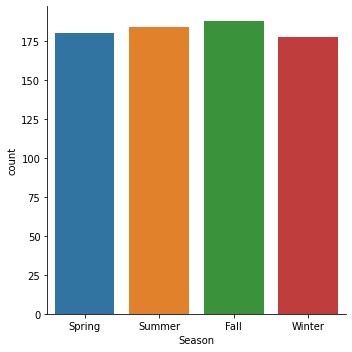

In [615]:
sns.catplot(x='Season',kind='count',data=df_ciudad)

### Holiday

No hay nada erroneo en la columna de identificación de si es un festivo o no.

In [616]:
df_ciudad['Holiday'].unique()

array(['No', 'Yes'], dtype=object)

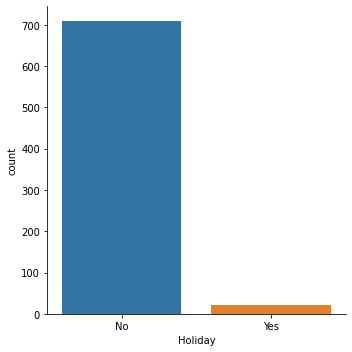

In [617]:
sns.catplot(x='Holiday',kind='count',data=df_ciudad)

### Weather

Se arreglará el valor de ' Partly    cloudy' para eliminar los espacios que sobra.

In [618]:
df_ciudad['Weather'].unique()

array(['Mist + Cloudy', 'Few clouds', ' Partly    cloudy', 'Clear',
       'Mist', 'Mist + Broken clouds', ' Partly cloudy',
       'Mist + Few clouds', 'Rain + Thunderstorm',
       'Light Rain + Scattered clouds', 'Snow'], dtype=object)

In [619]:
df_ciudad['Weather'] = df_ciudad['Weather'].replace({' Partly    cloudy':'Partly cloudy',
                                                     ' Partly cloudy':'Partly cloudy'})

Segun el comentario del meteorólogo se cambian todas a las siguientes 3 opciones:

1. Precipitation: Rain + Thunderstorm, Light Rain + Scattered clouds, Snow
2. Mist: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. Cloudy: Few clouds, Partly cloudy, Clear

In [620]:
dict_weather = {'Mist + Cloudy':'Mist','Few clouds':'Cloudy','Partly cloudy':'Cloudy',
                'Clear':'Cloudy','Mist + Broken clouds':'Mist','Mist + Few clouds':'Mist',
                'Rain + Thunderstorm':'Precipitation',
                'Light Rain + Scattered clouds':'Precipitation','Snow':'Precipitation'}
df_ciudad['Weather'] = df_ciudad['Weather'].replace(dict_weather)

In [621]:
df_ciudad['Weather'].unique()

array(['Mist', 'Cloudy', 'Precipitation'], dtype=object)

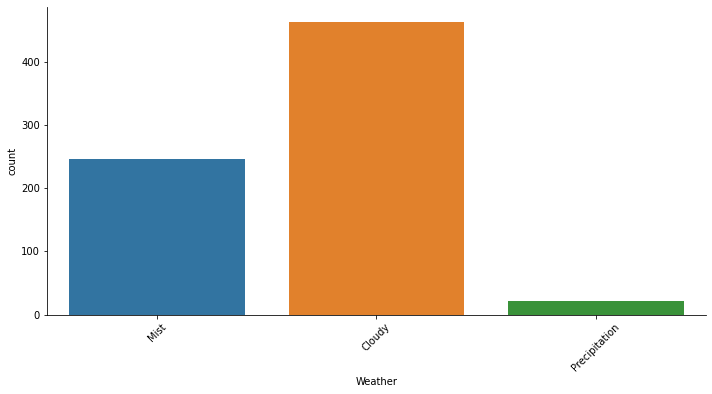

In [622]:
sns.catplot(x='Weather',kind='count',data=df_ciudad, aspect=2)
plt.xticks(rotation=45)
plt.show()

### Columnas cuantitativas.

In [623]:
df_ciudad.describe()

,instant,Temp,Feel_Temp,Hum,Wind,Casual,Registered,cnt
count,730.000000,726.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.919178,15.280824,14.302742,0.682446,12.669707,849.249315,3658.757534,4508.006849
std,211.299280,8.597859,7.661289,0.751180,5.421121,686.479875,1559.758728,1936.011647
min,1.000000,-5.220871,-4.283729,0.000000,-16.652113,2.000000,20.000000,22.000000
25%,183.250000,7.833137,7.876330,0.522187,9.000663,316.250000,2502.250000,3169.750000
50%,365.500000,15.460826,14.906132,0.628333,12.125057,717.000000,3664.500000,4548.500000
75%,548.750000,22.785000,20.619028,0.732187,15.624869,1096.500000,4783.250000,5966.000000
max,731.000000,32.498349,31.522112,10.867083,34.000021,3410.000000,6946.000000,8714.000000


#### Temp

Una posibilidad para imputar valores en la columna de Temp es utilizar la columna de Feel_Temp.

In [624]:
df_ciudad.loc[df_ciudad['Temp'].isna()]

,instant,Date,Season,Holiday,Weather,Temp,Feel_Temp,Hum,Wind,Casual,Registered,cnt
99,100,2020-04-10,Summer,No,Mist,NaN,12.056639,0.857500,9.833389,1188,1707,2895
229,230,2020-08-18,Fall,No,Cloudy,NaN,23.126126,0.654583,15.624936,639,3166,3805
562,563,2021-07-16,Fall,No,Cloudy,NaN,26.033875,0.645000,11.000529,1088,5742,6830
721,722,2021-12-22,Spring,No,Cloudy,NaN,3.097311,10.441250,27.292182,205,1544,1749


Se define una función que calcule el valor de la temperatura de acuerdo a la columna Feel_Temp.

In [625]:
def imp_temp(row):
    pos_sign = [1,-1]
    pos_mult = [0.1,0.075,0.05]
    multiplier = random.choice(pos_sign) * random.choice(pos_mult)
    return row * multiplier + row

In [626]:
df_ciudad['Temp'].loc[df_ciudad['Temp'].isna()] = imp_temp(df_ciudad['Feel_Temp'].loc[df_ciudad['Temp'].isna()])
df_ciudad.iloc[[99,229,562,721]]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,instant,Date,Season,Holiday,Weather,Temp,Feel_Temp,Hum,Wind,Casual,Registered,cnt
99,100,2020-04-10,Summer,No,Mist,12.659471,12.056639,0.857500,9.833389,1188,1707,2895
229,230,2020-08-18,Fall,No,Cloudy,24.282432,23.126126,0.654583,15.624936,639,3166,3805
563,564,2021-07-17,Fall,No,Cloudy,30.461651,27.517101,0.505833,7.666743,921,5865,6786
722,723,2021-12-23,Spring,No,Cloudy,3.554151,4.195137,0.515417,8.916561,408,1379,1787


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


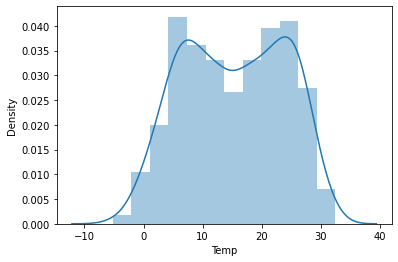

In [627]:
sns.distplot(df_ciudad['Temp'])

#### Hum

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


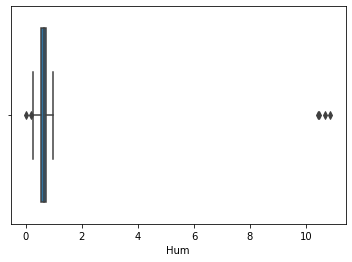

In [628]:
sns.boxplot(df_ciudad['Hum'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


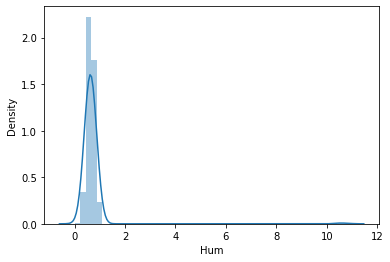

In [629]:
sns.distplot(df_ciudad['Hum'])

Para la humedad, se tiene un valores muy grandes por fuera de la distribución de la mayoria de datos. Para cambiar esto, se cambiaran estos valores por la moda, para valores por fuera de la media más o menos 3 sigma.

In [630]:
upper_tail = df_ciudad['Hum'].mean() + 3*df_ciudad['Hum'].std()
lower_tail = df_ciudad['Hum'].mean() - 3*df_ciudad['Hum'].std()
mode_hum = df_ciudad['Hum'].mode()[0]

def change_hum(row):
    if row > upper_tail or row < lower_tail:
        return float(mode_hum)
    else:
        return float(row)

In [631]:
df_ciudad['Hum'] = df_ciudad['Hum'].apply(change_hum)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


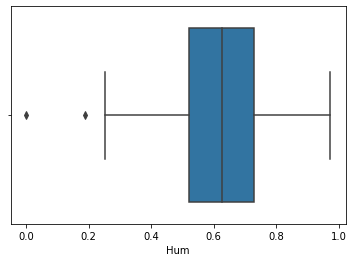

In [632]:
sns.boxplot(df_ciudad['Hum'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


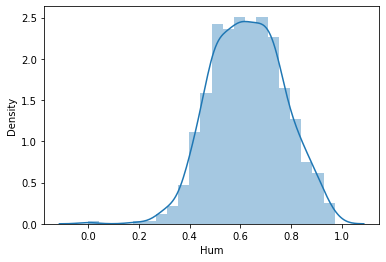

In [633]:
sns.distplot(df_ciudad['Hum'])

#### Wind

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


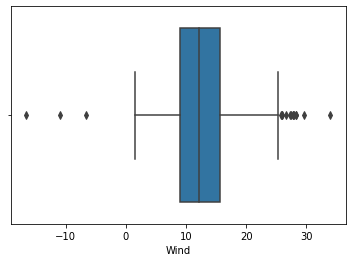

In [634]:
sns.boxplot(df_ciudad['Wind'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


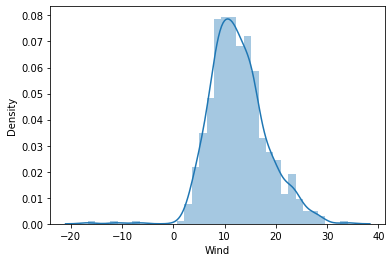

In [635]:
sns.distplot(df_ciudad['Wind'])

Como se tienen valores negativos para la velocidad del viento, primero se le aplica la función de abs() para cambiar esos valroees por negativos. Despues, se hace el mismo procedimiento de cambiar los valores por fuera de 3 sigmas desde la media por la moda.

In [636]:
df_ciudad['Wind'] = df_ciudad['Wind'].abs()

In [637]:
upper_tail = df_ciudad['Wind'].mean() + 3*df_ciudad['Wind'].std()
lower_tail = df_ciudad['Wind'].mean() - 3*df_ciudad['Wind'].std()
mode_wind = df_ciudad['Wind'].mode()[0]

def change_wind(row):
    if row > upper_tail or row < lower_tail:
        return float(mode_wind)
    else:
        return float(row)

In [638]:
df_ciudad['Wind'] = df_ciudad['Wind'].apply(change_wind)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


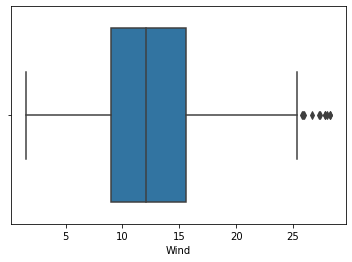

In [639]:
sns.boxplot(df_ciudad['Wind'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


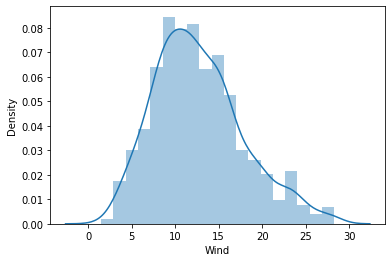

In [640]:
sns.distplot(df_ciudad['Wind'])

### Análisis bivariado

Primero se eliminaran las columnas que no se usaran para hacer el modelo de rregresion. Estas son: instant (identificador), Casual (Número de usuarios casuales) y Registered (Número de usuarios registrados).

In [641]:
df_ciudad = df_ciudad.drop(['instant','Casual','Registered'], axis=1)

In [642]:
df_ciudad.corr()

,Temp,Feel_Temp,Hum,Wind,cnt
Temp,1.000000,0.991711,0.125737,-0.158929,0.627273
Feel_Temp,0.991711,1.000000,0.138185,-0.185279,0.630685
Hum,0.125737,0.138185,1.000000,-0.221589,-0.100890
Wind,-0.158929,-0.185279,-0.221589,1.000000,-0.231273
cnt,0.627273,0.630685,-0.100890,-0.231273,1.000000


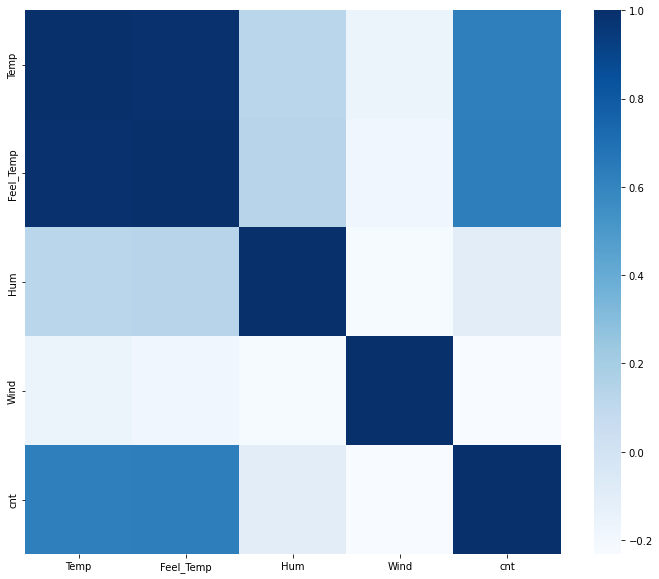

In [643]:
plt.figure(2,figsize=(12,10))
sns.heatmap(df_ciudad.corr(), cmap='Blues')

De la matriz de correlación y el mapa de calor se encuentra que las variables con mayor relación son las columnas de Temp y Feel_Temp, lo cual era lo esperado. Seguidamente, se puede ver que existe una relación alta entre la temperatura y sensación termica con la variable objetivo cnt, número total de bicicletas rentadas.

## Desarrollo de modelos de regresión

Primero se cambiaran las variables categoricas por digitos con la función dummies y cambiando No y Yes por 1 y 0 respectivamente para la variable Holiday. Por otra parte, se agregan nuevas columnas para la fecha como mes y día.

In [644]:
df_ciudad_reg = df_ciudad.copy()

In [645]:
df_ciudad_reg['Month'] = df_ciudad_reg['Date'].dt.month
df_ciudad_reg['Day_week'] = df_ciudad_reg['Date'].dt.dayofweek
df_ciudad_reg = df_ciudad_reg.drop('Date',axis=1)

In [646]:
df_ciudad_reg['Holiday'] = df_ciudad_reg['Holiday'].replace({'No':'1','Yes':'0'})

In [647]:
df_season = pd.get_dummies(df_ciudad_reg['Season'])
df_ciudad_reg = pd.concat([df_ciudad_reg,df_season], axis = 1).drop('Season',axis=1)

In [648]:
df_weather = pd.get_dummies(df_ciudad_reg['Weather'])
df_ciudad_reg = pd.concat([df_ciudad_reg,df_weather], axis = 1).drop('Weather',axis=1)

In [649]:
df_ciudad_reg.head()

,Holiday,Temp,Feel_Temp,Hum,Wind,cnt,Month,Day_week,Fall,Spring,Summer,Winter,Cloudy,Mist,Precipitation
0,1,8.175849,9.090375,0.805833,10.749882,985,1,2,0,1,0,0,0,1,0
1,1,9.083466,8.625733,0.696087,16.652113,801,1,3,0,1,0,0,0,1,0
2,1,1.229108,0.902035,0.437273,16.636703,1349,1,4,0,1,0,0,1,0,0
3,1,1.400000,1.969734,0.590435,10.739832,1562,1,5,0,1,0,0,1,0,0
4,1,2.666979,2.775690,0.436957,12.522300,1600,1,6,0,1,0,0,1,0,0


Despues de tener todas las variables representadas cuantitativamente se prosigue a definir las variables para el modelo X y Y.

In [650]:
df_ciudad_reg.shape

(730, 15)

In [651]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [652]:
X = df_ciudad_reg.drop('cnt',axis=1)
Y = df_ciudad_reg['cnt']

In [653]:
X.columns

Index(['Holiday', 'Temp', 'Feel_Temp', 'Hum', 'Wind', 'Month', 'Day_week',
       'Fall', 'Spring', 'Summer', 'Winter', 'Cloudy', 'Mist',
       'Precipitation'],
      dtype='object')

Despues se definen los datos de entrenamiento y prueba.

In [654]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=1)

Por último, se normalizan los datos de X.

In [655]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Se realizan 6 modelos:
1. Regresión lineal normal.
2. Regresión lineal normal con transformación polinomial grado 2.
3. Regresión lineal normal con transformación polinomial grado 3.
4. Regresión lineal normal con transformación polinomial grado 2 con regularización Ridge variando alpha.
5. Regresión lineal normal con transformación polinomial grado 3 regularización Ridge variando alpha.

In [690]:
lin_reg = LinearRegression()
model_reg = lin_reg.fit(X_train_scaled,Y_train)

print('intercept: {}'.format(model_reg.intercept_))

print('coefficients: {}'.format(model_reg.coef_))

intercept: 4547.921232876713
coefficients: [ 106.8563901  1099.29712852  -64.04094499 -370.83358916 -246.19685872
   10.80568083  -36.02048493  -82.02285162 -321.87361231  117.7776891
  279.84249481   86.65173659   23.6624917  -313.2078967 ]


De esto conocemos que las variables que más afectan a la cantidad total de bicicletas rentadas son:
1. La temperatura del día (directamente)
2. La Humedad del día (inversamente)
3. Si es Primavera (inversamente)

In [691]:
preds_train = model_reg.predict(X_train_scaled)
preds_test = model_reg.predict(X_test_scaled)

In [692]:
print('Regresión Lineal normal')
print('MAE train:',mean_absolute_error(Y_train, preds_train), 'MAE test:',mean_absolute_error(Y_test, preds_test))
print('RSEM train:',np.sqrt(mean_squared_error(Y_train, preds_train)), 'RSEM test:', np.sqrt(mean_squared_error(Y_test, preds_test)))

Regresión Lineal normal
MAE train: 1108.601812465836 MAE test: 1094.1932374649602
RSEM train: 1304.3809506481457 RSEM test: 1236.8567058965466


De los resultados de error entre los sets de entrenamiento y prueba, se obtienen mejores valores de error para el set de prueba por lo que se descarta el overfitting. Por otro lado, los errores son muy altos,  no se puede concluir si hay underfitting porque la descripción de la variable tambien presenta una variación mayor a 1500.

Se prosigue con los demás modelos.

In [659]:
poly_features_2 = PolynomialFeatures(degree=2, include_bias=False)
poly_features_3 = PolynomialFeatures(degree=3, include_bias=False)

X_poly_2_train = poly_features_2.fit_transform(X_train_scaled)
X_poly_3_train = poly_features_3.fit_transform(X_train_scaled)

X_poly_2_test = poly_features_2.fit_transform(X_test_scaled)
X_poly_3_test = poly_features_3.fit_transform(X_test_scaled)

In [668]:
# Regresión Lineal Poly 2
lin_reg = LinearRegression()
model = lin_reg.fit(X_poly_2_train,Y_train)

preds_train_r_2 = model.predict(X_poly_2_train)
preds_test_r_2 = model.predict(X_poly_2_test)

print('Regresión Lineal normal para una transformación polinómica grado 2')
print('MAE train:',mean_absolute_error(Y_train, preds_train_r_2), 'MAE test:',mean_absolute_error(Y_test, preds_test_r_2))
print('RSEM train:',np.sqrt(mean_squared_error(Y_train, preds_train_r_2)), 'RSEM test:', np.sqrt(mean_squared_error(Y_test, preds_test_r_2)))

Regresión Lineal normal para una transformación polinómica grado 2
MAE train: 929.576198630137 MAE test: 1135.8321917808219
RSEM train: 1082.7913348906998 RSEM test: 1292.7891829588236


In [669]:
# Regresión Lineal Poly 3
lin_reg = LinearRegression()
model = lin_reg.fit(X_poly_3_train,Y_train)

preds_train_r_3 = model.predict(X_poly_3_train)
preds_test_r_3 = model.predict(X_poly_3_test)

print('Regresión Lineal normal para una transformación polinómica grado 3')
print('MAE train:',mean_absolute_error(Y_train, preds_train_r_3), 'MAE test:',mean_absolute_error(Y_test, preds_test_r_3))
print('RSEM train:',np.sqrt(mean_squared_error(Y_train, preds_train_r_3)), 'RSEM test:', np.sqrt(mean_squared_error(Y_test, preds_test_r_3)))

Regresión Lineal normal para una transformación polinómica grado 3
MAE train: 697.601535744863 MAE test: 108843977693999.56
RSEM train: 869.294265256451 RSEM test: 727981872822601.8


In [678]:
alphas = [93,94,95,96,97]

# Poly 2
for alpha in alphas:
    print('Ridge para un alpha = {}'.format(alpha))
    ridge_reg = Ridge(alpha=alpha, solver='cholesky')
    ridge_reg.fit(X_poly_2_train,Y_train)

    preds_train = ridge_reg.predict(X_poly_2_train)
    preds_test = ridge_reg.predict(X_poly_2_test)

    print('MAE train = {}'.format(mean_absolute_error(Y_train, preds_train)))
    print('MAE test = {}'.format(mean_absolute_error(Y_test, preds_test)))
    print('RMSE train = {}'.format(np.sqrt(mean_squared_error(Y_train, preds_train))))
    print('RMSE test = {}'.format(np.sqrt(mean_squared_error(Y_test, preds_test))))
    print('\n')

Ridge para un alpha = 93
MAE train = 984.0381571216321
MAE test = 1106.4418767850175
RMSE train = 1128.8035549059693
RMSE test = 1242.25010801899


Ridge para un alpha = 94
MAE train = 984.2614191648142
MAE test = 1106.5456069936617
RMSE train = 1129.0274523916146
RMSE test = 1242.2474385084552


Ridge para un alpha = 95
MAE train = 984.4827733198649
MAE test = 1106.6486182967901
RMSE train = 1129.2508240109607
RMSE test = 1242.246703190835


Ridge para un alpha = 96
MAE train = 984.7022519207602
MAE test = 1106.7509210346677
RMSE train = 1129.473675331563
RMSE test = 1242.2478638918676


Ridge para un alpha = 97
MAE train = 984.9198864410213
MAE test = 1106.8525253379844
RMSE train = 1129.6960117405247
RMSE test = 1242.2508834590817




In [686]:
alphas = [159,160,161,162,163]

# Poly 3
for alpha in alphas:
    print('Ridge para un alpha = {}'.format(alpha))
    ridge_reg = Ridge(alpha=alpha, solver='cholesky')
    ridge_reg.fit(X_poly_3_train,Y_train)

    preds_train = ridge_reg.predict(X_poly_3_train)
    preds_test = ridge_reg.predict(X_poly_3_test)

    print('MAE train = {}'.format(mean_absolute_error(Y_train, preds_train)))
    print('MAE test = {}'.format(mean_absolute_error(Y_test, preds_test)))
    print('RMSE train = {}'.format(np.sqrt(mean_squared_error(Y_train, preds_train))))
    print('RMSE test = {}'.format(np.sqrt(mean_squared_error(Y_test, preds_test))))
    print('\n')

Ridge para un alpha = 159
MAE train = 862.8698619259246
MAE test = 1035.5942115737275
RMSE train = 1011.0472698552167
RMSE test = 1177.249053210452


Ridge para un alpha = 160
MAE train = 863.1076185379671
MAE test = 1035.6238230830977
RMSE train = 1011.2600021049584
RMSE test = 1177.2480920759933


Ridge para un alpha = 161
MAE train = 863.3439582662602
MAE test = 1035.6532766831303
RMSE train = 1011.4718832662605
RMSE test = 1177.2481646781434


Ridge para un alpha = 162
MAE train = 863.5788971008026
MAE test = 1035.6825760647878
RMSE train = 1011.6829214203034
RMSE test = 1177.249250280238


Ridge para un alpha = 163
MAE train = 863.8127070456441
MAE test = 1035.7117248053617
RMSE train = 1011.8931245251038
RMSE test = 1177.2513286113342




## Evalucación de modelos

El mejor modelo encontrado fue para una transformación polinómica de grado 3 con regularización Ridge con alpha igual a 160. Para comparar los modelos se utilizó los valores de RSME para el set de prueba.

## Interpretación

El día de la presentación de resultados, una persona de la alcaldía le hace las siguientes
preguntas:
* ¿Cuáles son las 3 variables más importantes para la predicción de la cantidad de
usuarios?

* Describa cual es el escenario ideal para el incremento de usuarios.

* ¿Qué pasos adicionales deberían tener en cuenta para una próxima
iteración/mejora del modelo?


In [695]:
coeficientes = pd.DataFrame()
coeficientes['features'] = X.columns
coeficientes['coeficiente'] = model_reg.coef_
coeficientes.sort_values('coeficiente')

,features,coeficiente
3,Hum,-370.833589
8,Spring,-321.873612
13,Precipitation,-313.207897
4,Wind,-246.196859
7,Fall,-82.022852
2,Feel_Temp,-64.040945
6,Day_week,-36.020485
5,Month,10.805681
12,Mist,23.662492
11,Cloudy,86.651737


De acuerdo a los coeficientes de cada variable, las más importantes son:

1. La temperatura con un peso de $1099.297$ y la relación es directa, ambas crecen.

2. La humedad con un peso de $-370.834$ y la relación es inversa. Si la humedad aumenta, el número total de bicicletas rentadas es menor.

3. Si la estación es primavera con un peso de $-321.874$ y la relación es inversa. Si es primavera, el número total de bicicletas rentadas es menor.

El escenario ideal para incrementar el número de usuarios seria tener un día con alta temperatura, baja humedad, que no sea primavera (preferiblemente Invierno) y que el clima no sea de precipitación.

Para una próxima iteración podría ser bueno agregar variables como la zona en donde se hace el alquiler de la bicicleta para disponer más bicicletas para las zonas que más usuarios tienen y tener un número mayor de bicicletas al mismo tiempo. Por otra parte, también se podría implementar una variable de hora en el que se hizo el alquiler de la bicicleta para encontrar los horarios en los que se movilizan mas usuarios. Finalmente, para mejorar el modelo se puede escoger por uno no lineal como una red neuronal, o si se sigue con un modelo de regresión lineal, probar otros métodos de regularización y mas transformaciones.